In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns 
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import scipy.cluster.hierarchy as sch
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# Explore Data

In [3]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv',sep=',',encoding='utf')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df = df.drop(["CustomerID"],axis = 1)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Editing

* I will do changes to the dataset.
* I will change the name of the columns because the name of the columns have space between and I don't want the space.
* I specify the name of the columns in the code below.

In [8]:
df.columns = ["Gender","Age","Annual_Income","Spending_Score"]
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Visualization 

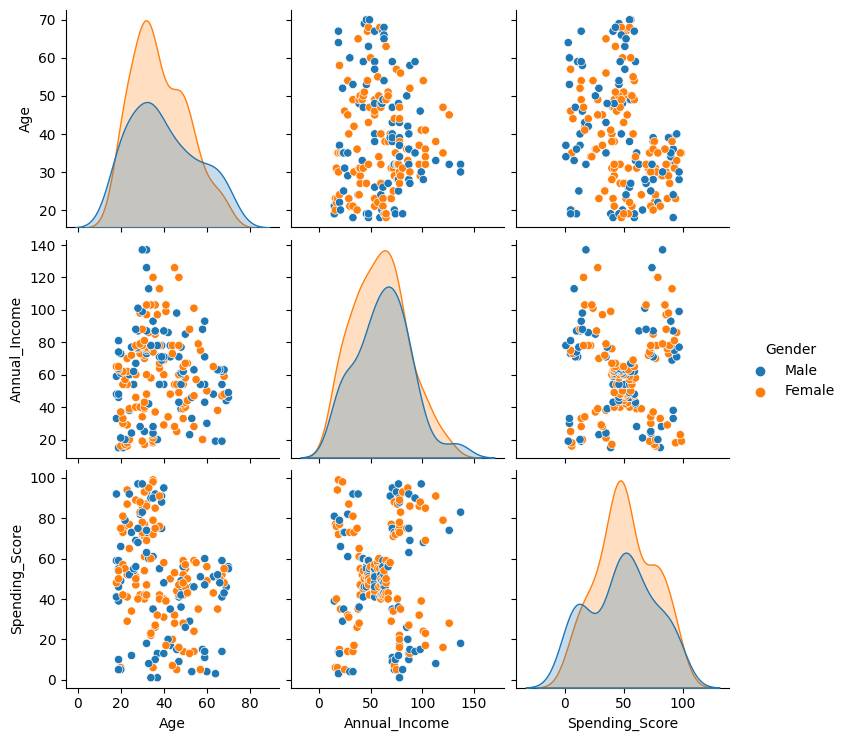

In [9]:
sns.pairplot(df, hue = "Gender")

Gender
Female    112
Male       88
Name: count, dtype: int64

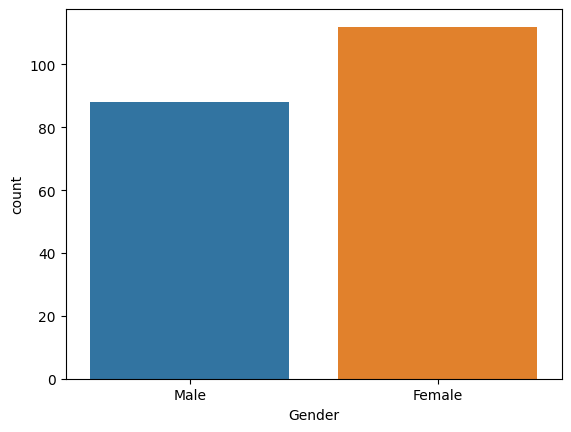

In [10]:
# The number of Genre in the dataset and its graphic.
sns.countplot(x = "Gender", data = df)
df.loc[:,"Gender"].value_counts()

In [11]:
dataAge = df["Age"].value_counts(dropna = False)
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge)
y = df.Age.value_counts().index

DataAge = {"Age": y, "Number": x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x = "Age", y = "Number",)
fig.show()

In [12]:
dataAI = df["Annual_Income"].value_counts(dropna = False)
npar_dataAI = np.array(dataAI)
x = list(npar_dataAI)
y = df.Annual_Income.value_counts().index

DataAI = {"Annual_Income": y, "Number": x}
DataAI = pd.DataFrame(DataAI)

fig = px.bar(DataAI, x = "Annual_Income", y = "Number",)
fig.show()

In [13]:
dataSS = df["Spending_Score"].value_counts(dropna = False)
npar_dataSS = np.array(dataSS)
x = list(npar_dataSS)
y = df.Spending_Score.value_counts().index

DataSS = {"Spending_Score": y, "Number": x}
DataSS = pd.DataFrame(DataSS)

fig = px.bar(DataSS, x = "Spending_Score", y = "Number", )
fig.show()

# Clustering Models

In [14]:
trace1= go.Scatter3d(
        x=df.Annual_Income,
        y=df.Spending_Score,
        z=df.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)

data_plot=[trace1]

layout = go.Layout(
            margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0
            )
)

fig=go.Figure(data = data_plot, layout = layout)
iplot(fig)

## K-Means Clustaring 

In [15]:
X_data = df.iloc[:,1:]
X_data

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(X_data)
    wcss.append(km.inertia_)

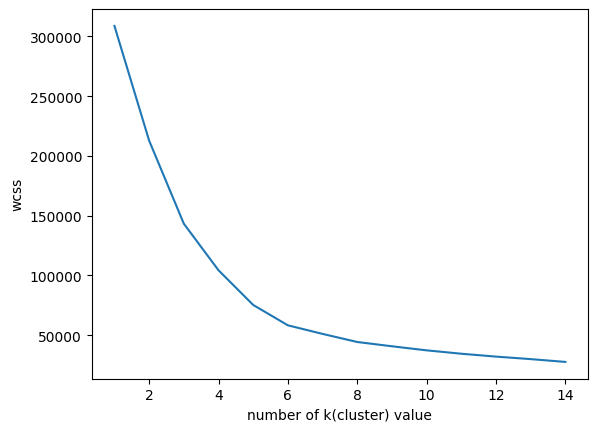

In [17]:
plt.plot(range(1,15), wcss)
plt.xlabel("number of k(cluster) value")
plt.ylabel("wcss")
plt.show()

In [18]:
km_last = KMeans(n_clusters=5)

data_pred = km_last.fit_predict(X_data)

data_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [19]:
X_data['cluster'] = data_pred
X_data

,Age,Annual_Income,Spending_Score,cluster
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,4
197,32,126,74,2
198,32,137,18,4


In [20]:
data0 = X_data[X_data['cluster']==0]
data1 = X_data[X_data['cluster']==1]
data2 = X_data[X_data['cluster']==2]
data3 = X_data[X_data['cluster']==3]
data4 = X_data[X_data['cluster']==4]

In [21]:
trace0= go.Scatter3d(
        x=data0.Annual_Income,
        y=data0.Spending_Score,
        z=data0.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)
trace1= go.Scatter3d(
        x=data1.Annual_Income,
        y=data1.Spending_Score,
        z=data1.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace2= go.Scatter3d( x=data2.Annual_Income,
        y=data2.Spending_Score,
        z=data2.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,0,255)",                                   # set color to an array/list of desired values  
        )
)
trace3= go.Scatter3d(
        x=data3.Annual_Income,
        y=data3.Spending_Score,
        z=data3.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace4= go.Scatter3d(
        x=data4.Annual_Income,
        y=data4.Spending_Score,
        z=data4.Age,
        mode="markers",
        marker=dict(size=10,
                    color="rgb(127,0,255)",                                   # set color to an array/list of desired values  
        )
)

data_plot_km=[trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))

fig=go.Figure(data = data_plot_km, layout = layout)
iplot(fig)
print("x : Annual_Income")
print("y : Spending_Score")
print("z : Age")

x : Annual_Income
y : Spending_Score
z : Age
